# Metrics Logger
Extracting data from pds.log to visualize the training and validation accuracies of all of the folds

## Importing Libraries
Primarily matplotlib and numpy, to help with graphing and visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Getting values
Getting all of the values from pds.log, and then returning them as arrays

In [2]:
def get_values(filepath):
    losses = []
    accs = []
    val_losses = []
    val_accs = []
    with open(filepath) as fp:
        line = fp.readline()
        while line:
            if "/step" in line:
                vals = get_metrics(line)
                accs.append(vals[0])
                losses.append(vals[1])
                val_losses.append(vals[2])
                val_accs.append(vals[3])
            line = fp.readline()

    return accs, losses, val_losses, val_accs

## Extracting from a single line
This function extracts all of the pertinent metrics from a single line at the end of the epoch

In [3]:
def get_metrics(line):
    vals = []
    metrics = ["acc:", "loss:", "val_loss:", "val_acc:"]
    for metric in metrics:
        index = line.index(metric) + len(metric) + 1
        val = line[index : index + 7]
        vals.append(val)
    return vals

## Graphing values
Graphing each individual metric with a reference array

In [4]:
def graph_metric(values, metric, fold):
    ref = []
    for i in range (1, 101):
        ref.append(i)
    ref_np = np.array(ref).astype(np.float)
    values_np = np.array(values).astype(np.float)
    plt.figure()
    plt.scatter(ref_np, values_np)
    plt.title(metric + ": Fold " + str(int(fold)))
    plt.xlabel("Epoch")
    plt.ylabel(metric)

## Running all functions
Loads in all of the data, and plots them for each fold

In [5]:
def run_vals():
    accs, losses, val_losses, val_accs = get_values('data-two/pds.log')
    for a in range(0, 901, 100):
        graph_metric(accs[a: a + 100], "Accuracy", a / 100 + 1)
        graph_metric(losses[a: a + 100], "Losses", a / 100 + 1)
        graph_metric(val_accs[a: a + 100], "Validation Accuracy", a / 100 + 1)
        graph_metric(val_losses[a: a + 100], "Validation Losses", a / 100 + 1)

### Running function
Final run!

<ipython-input-4-7fdb053c7ba2>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


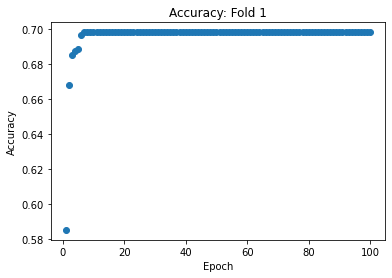

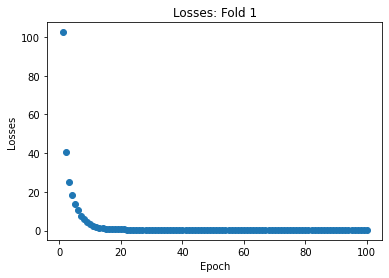

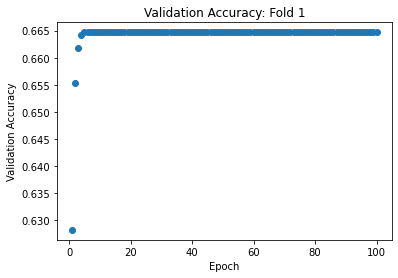

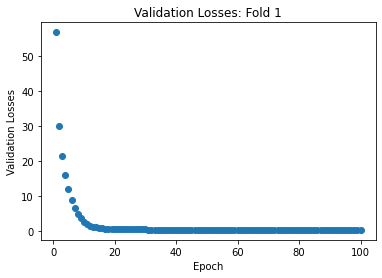

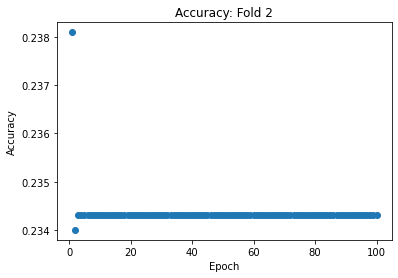

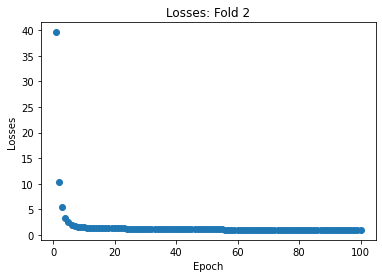

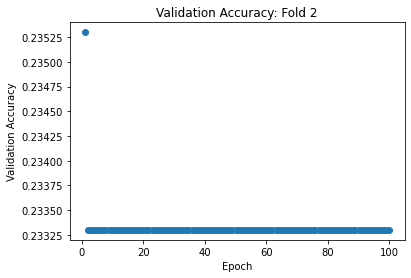

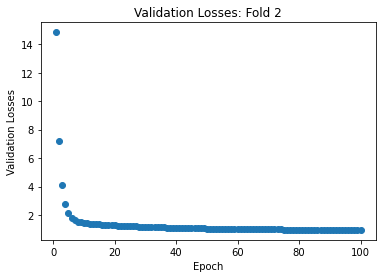

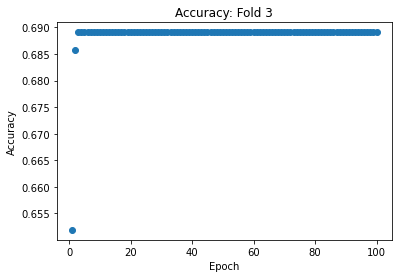

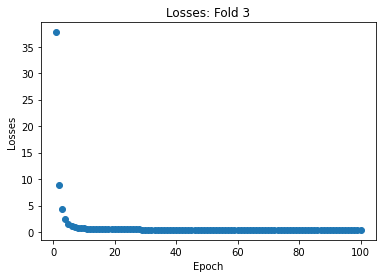

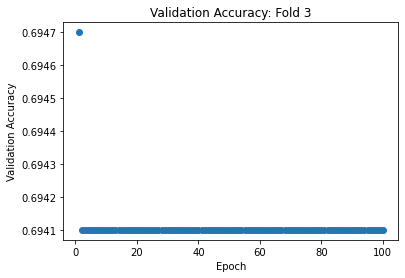

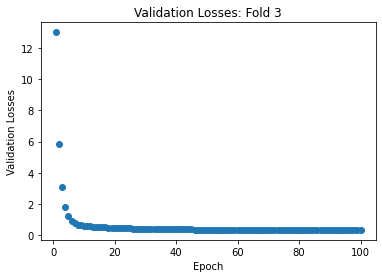

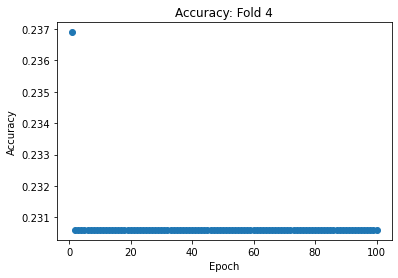

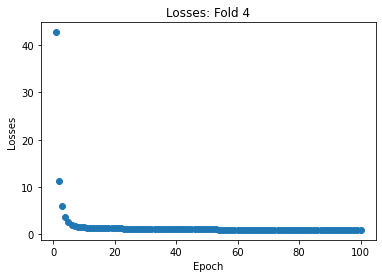

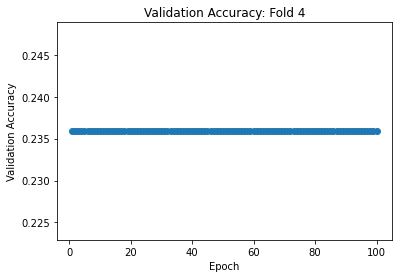

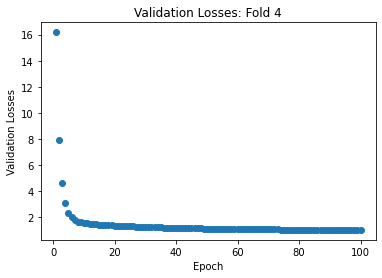

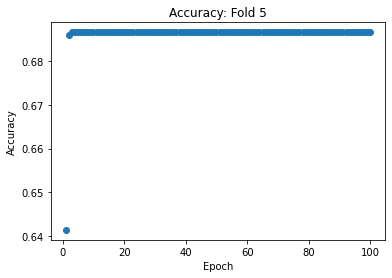

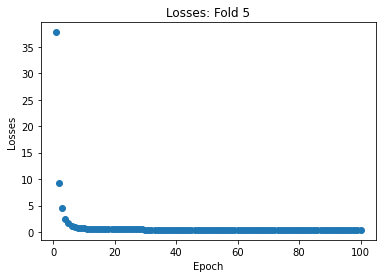

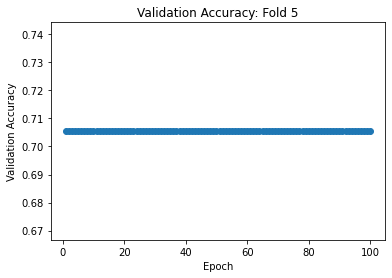

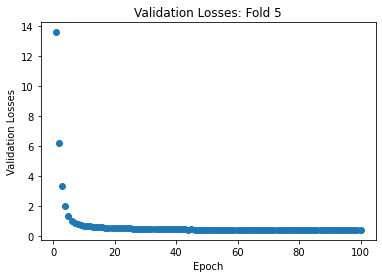

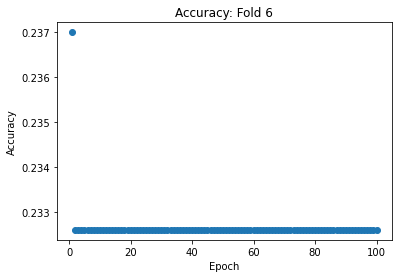

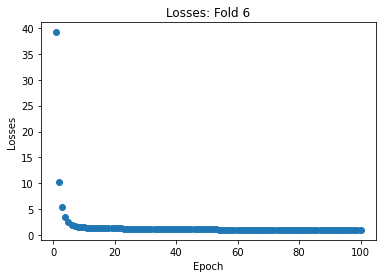

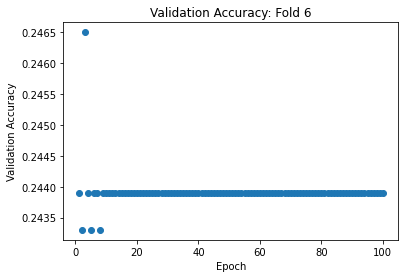

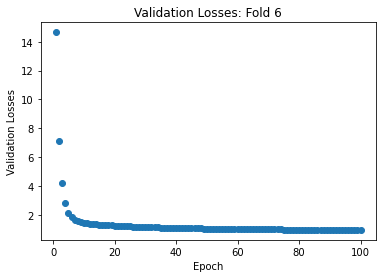

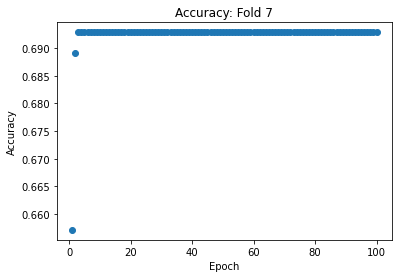

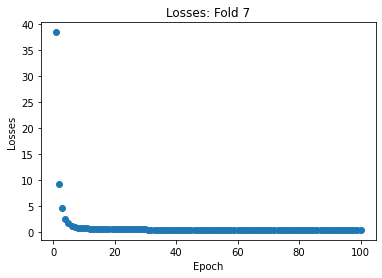

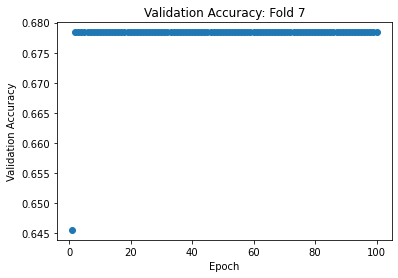

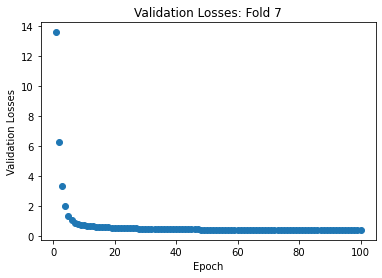

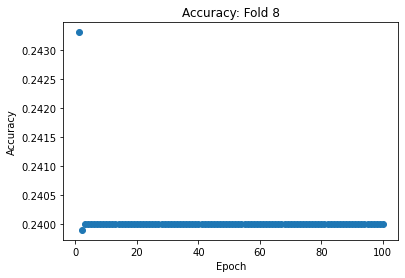

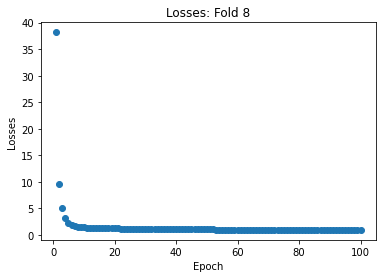

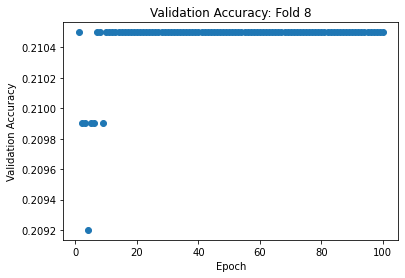

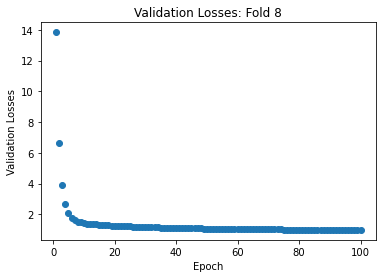

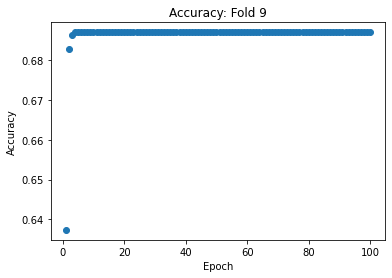

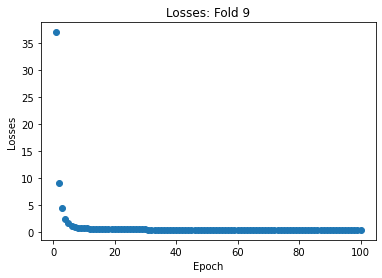

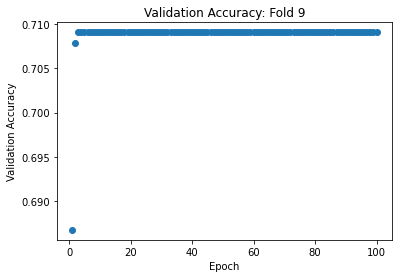

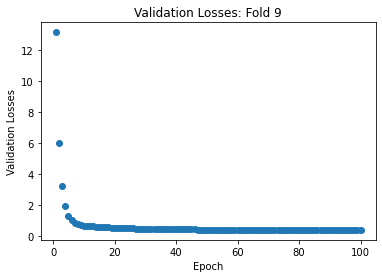

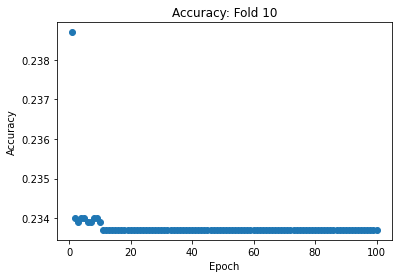

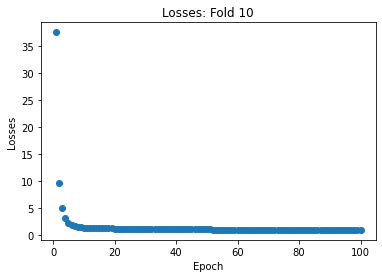

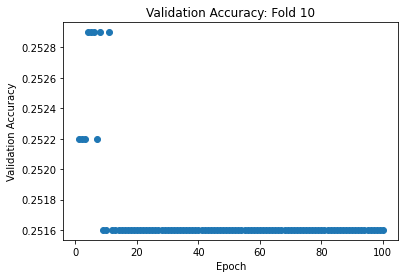

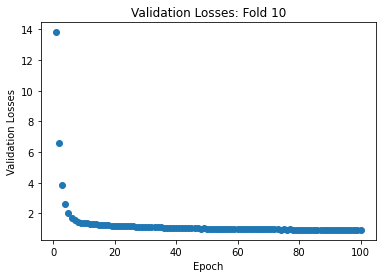

In [6]:
run_vals()

[0.537139, 0.565991, 0.538367, 0.513198, 0.535298, 0.669122, 0.736034, 0.528545, 0.620012, 0.77655, 0.734193, 0.763659, 0.736648, 0.751381, 0.785144, 0.800491, 0.754451, 0.824432, 0.837324, 0.841621, 0.75752, 0.801105, 0.739104, 0.836096, 0.820749, 0.818907, 0.763659, 0.639656, 0.859423, 0.866789, 0.856354, 0.871087, 0.867403, 0.853898, 0.868631, 0.759362, 0.8717, 0.846532, 0.858809, 0.878453, 0.864948, 0.873542, 0.873542, 0.8717, 0.838551, 0.883978, 0.870473, 0.879067, 0.872314, 0.868631, 0.872928, 0.821363, 0.880909, 0.886433, 0.88275, 0.876611, 0.865562, 0.888889, 0.887047, 0.885206, 0.80663, 0.857581, 0.892572, 0.856967, 0.847759, 0.848987, 0.884592, 0.883364, 0.891344, 0.84162, 0.8809, 0.8938, 0.86126, 0.89073, 0.89195, 0.89195, 0.88582, 0.89011, 0.81338, 0.89686, 0.87783, 0.89625, 0.89502, 0.903, 0.89564, 0.86863, 0.89195, 0.82013, 0.89993, 0.87599, 0.87722, 0.90239, 0.85205, 0.88275, 0.89871, 0.89257, 0.86863, 0.88888, 0.89748, 0.90546, 0.90055, 0.81706, 0.89318, 0.87968, 0.8686

Text(0.5, 0, 'Epoch')

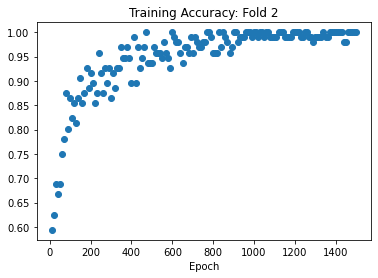

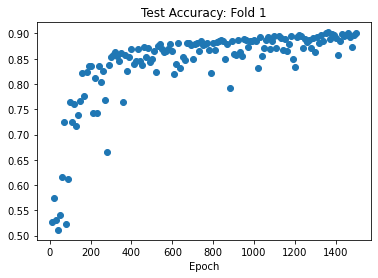

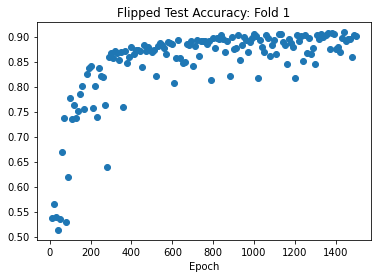

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import csv
with open('/Users/cpondoc/Documents/qingyu_data/scripts/fold_1_results.txt') as size_file:
    data = []
    head_reader = csv.reader(size_file, delimiter=',')
    line_count = 0
    for row in head_reader:
        if line_count == 0:
            line_count += 1
        else:
            data.append(row)
    #print(data)

epochs = []
acc_numbers = []
first_test_accs = []
second_test_accs = []

for row in data:
    test_acc_index = row[1].find("Acc:")
    second_position = row[1][test_acc_index + 5:]
    next_ind = second_position.find(" ")
    first_test_acc = float(second_position[:next_ind])
    second_test_acc = float(second_position[next_ind + 1:-1])
    first_test_accs.append(first_test_acc)
    second_test_accs.append(second_test_acc)
    epoch_number = row[0].find(" ")
    acc_number = row[0].find("Acc:")
    epochs.append(float(row[0][0:epoch_number]))
    number = float(row[0][acc_number + 5:])
    acc_numbers.append(number)
print(second_test_accs)
ref_np = np.array(epochs).astype(np.float)
values_np = np.array(acc_numbers).astype(np.float)
plt.figure()
plt.scatter(ref_np, values_np)
plt.title("Training Accuracy: Fold " + str(2))
plt.xlabel("Epoch")

second_values_np = np.array(first_test_accs).astype(np.float)
plt.figure()
plt.scatter(ref_np, second_values_np)
plt.title("Test Accuracy: Fold " + str(1))
plt.xlabel("Epoch")

third_values_np = np.array(second_test_accs).astype(np.float)
plt.figure()
plt.scatter(ref_np, third_values_np)
plt.title("Flipped Test Accuracy: Fold " + str(1))
plt.xlabel("Epoch")